In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [145]:
data = pd.read_csv('Mall_Customers.csv')
display(data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [147]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

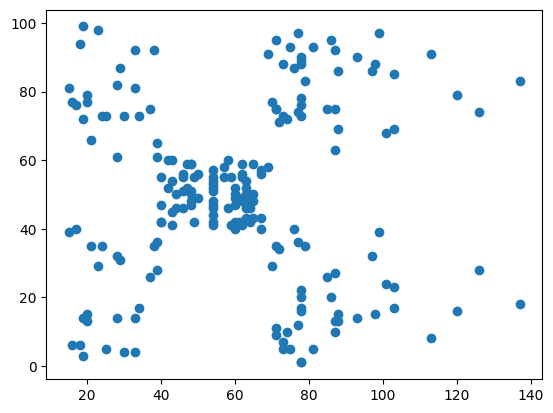

In [148]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [149]:
#import numpy as np
#colorL = np.array(['green','red','brown'])

In [150]:
#plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=colorL[model.labels_])

In [151]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


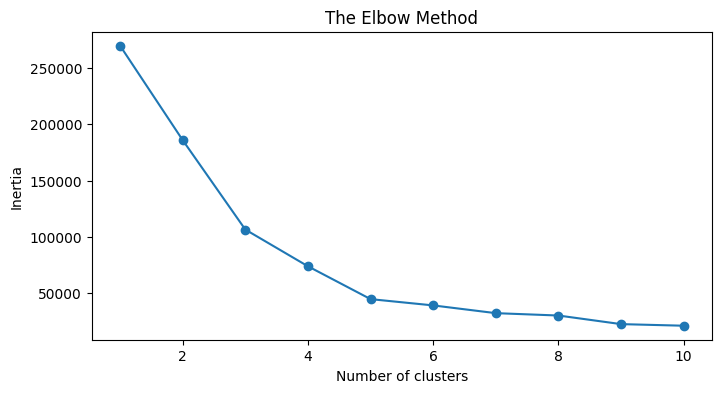

In [152]:

from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Create a plot
plt.figure(figsize=(8, 4))
# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [153]:
# Applying KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)  # Choose an appropriate number of clusters
X['Cluster'] = kmeans.fit_predict(X)

C:\Users\SYN\AppData\Local\Temp\ipykernel_11668\2669152107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


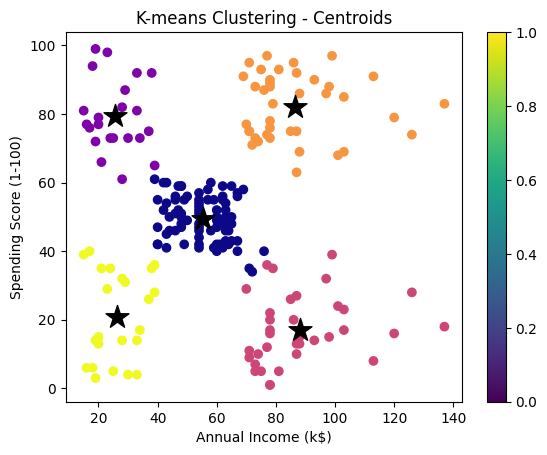

Cluster
0    81
3    39
2    35
4    23
1    22
Name: count, dtype: int64

In [154]:
plt.scatter(X['Annual Income (k$)'],data['Spending Score (1-100)'], c=X['Cluster'], cmap='plasma')

# Get the cluster centroids

centroids = kmeans.cluster_centers_
# Add the centroids to the scatter plot
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*')
# Add labels to the plot
plt.title('K-means Clustering - Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()
X['Cluster'].value_counts()

In [155]:
# Evaluation du clustering, Calcul de l'indice de silhouette
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X[['Annual Income (k$)','Spending Score (1-100)']], X['Cluster'])
print("Pour n_clusters =", 3, "Le score de silhouette moyen est :", silhouette_avg)

Pour n_clusters = 3 Le score de silhouette moyen est : 0.553931997444648
